# Dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

# Exploratory data analysis

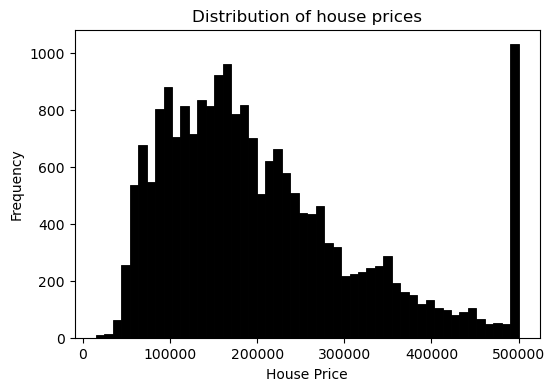

In [3]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('House Price')
plt.title('Distribution of house prices')

plt.show()

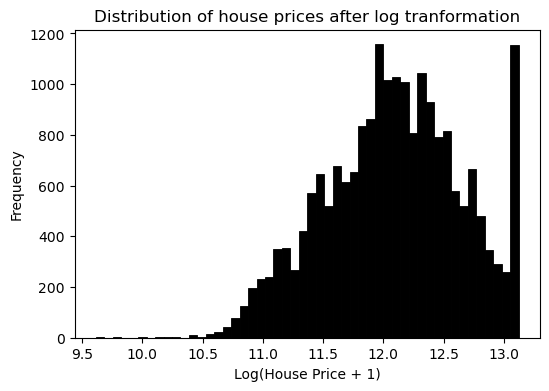

In [4]:
log_house_price = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_house_price, bins=50, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(House Price + 1)')
plt.title('Distribution of house prices after log tranformation')

plt.show()

# Features

In [5]:
cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df_features = df[cols]
df_features

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1

In [6]:
feature_sum = df_features.isnull().sum()
feature_sum[feature_sum > 0]

total_bedrooms    207
dtype: int64

# Question 2

In [7]:
df_features.population.median()

1166.0

# Split the data

In [8]:
np.random.seed(42)

n = len(df_features)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_features.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3

In [9]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [10]:
def prepare_X(df, fill_val):
    df_num = df.copy()
    df_num = df_num.fillna(fill_val)
    X = df_num.values
    
    return X

In [12]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    
    return np.sqrt(mse)

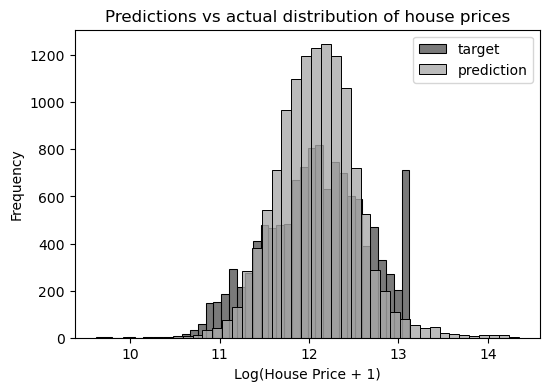

rmse_train_zeros = 0.34131359101566766
rmse_val_zeros = 0.32953303652313454


In [13]:
# fill total_bedrooms with zeros and compute the RMSE
X_train_zeros = prepare_X(df_train, 0)
w_0_zeros, w_zeros = train_linear_regression(X_train_zeros, y_train)
y_pred_zeros = w_0_zeros + X_train_zeros.dot(w_zeros)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_zeros, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(House Price + 1)')
plt.title('Predictions vs actual distribution of house prices')

plt.show()

rmse_train_zeros = rmse(y_train, y_pred_zeros)
print("rmse_train_zeros =", rmse_train_zeros)

X_val_zeros = prepare_X(df_val, 0)
y_pred_val_zeros = w_0_zeros + X_val_zeros.dot(w_zeros)

rmse_val_zeros = rmse(y_val, y_pred_val_zeros)
print("rmse_val_zeros =", rmse_val_zeros)

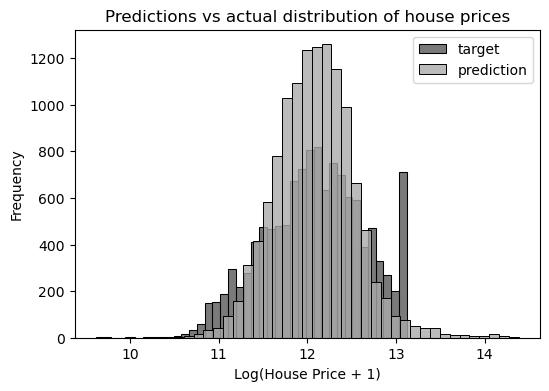

rmse_train_mean = 0.34104161810328065
rmse_val_mean = 0.3290195439004034


In [14]:
# fill total_bedrooms with mean and compute the RMSE
total_bedrooms_mean = df_train.total_bedrooms.mean()
X_train_mean = prepare_X(df_train, total_bedrooms_mean)
w_0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w_0_mean + X_train_mean.dot(w_mean)

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(House Price + 1)')
plt.title('Predictions vs actual distribution of house prices')

plt.show()

rmse_train_mean = rmse(y_train, y_pred_mean)
print("rmse_train_mean =", rmse_train_mean)

X_val_mean = prepare_X(df_val, total_bedrooms_mean)
y_pred_val_mean = w_0_mean + X_val_mean.dot(w_mean)

rmse_val_mean = rmse(y_val, y_pred_val_mean)
print("rmse_val_mean =", rmse_val_mean)

In [15]:
# comparing the two options
round(rmse_val_zeros, 2), round(rmse_val_mean, 2)

(0.33, 0.33)

# Question 4

In [16]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [21]:
X_train_zeros_reg = prepare_X(df_train, 0)
X_val_zeros_reg = prepare_X(df_val, 0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_zeros_reg, y_train, r=r)
    y_pred_val_reg = w_0 + X_val_zeros_reg.dot(w)
    rmse_val_reg = rmse(y_val, y_pred_val_reg)
    print('%6s' %r, round(rmse_val_reg, 2))


     0 0.33
 1e-06 0.33
0.0001 0.33
 0.001 0.33
  0.01 0.33
   0.1 0.33
     1 0.33
     5 0.34
    10 0.34


# Question 5

In [39]:
rmse_s = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # split the data for the current seed
    np.random.seed(s)
    n_s = len(df_features)

    n_val_s = int(0.2 * n_s)
    n_test_s = int(0.2 * n_s)
    n_train_s = n_s - (n_val_s + n_test_s)

    idx_s = np.arange(n_s)
    np.random.shuffle(idx_s)

    df_shuffled_s = df_features.iloc[idx_s]

    df_train_s = df_shuffled_s.iloc[:n_train_s].copy()
    df_val_s = df_shuffled_s.iloc[n_train_s:n_train_s + n_val_s].copy()
    df_test_s = df_shuffled_s.iloc[n_train_s + n_val_s:].copy()

    y_train_s = np.log1p(df_train_s.median_house_value.values)
    y_val_s = np.log1p(df_val_s.median_house_value.values)
    y_test_s = np.log1p(df_test_s.median_house_value.values)

    del df_train_s['median_house_value']
    del df_val_s['median_house_value']
    del df_test_s['median_house_value']
    
    # fill total_bedrooms with zeros and train the model for the current seed
    X_train_s_zeros = prepare_X(df_train_s, 0)
    w_0_s_zeros, w_s_zeros = train_linear_regression(X_train_s_zeros, y_train_s)

    # Evaluate the model on the validation dataset and compute the RMSE
    X_val_s_zeros = prepare_X(df_val_s, 0)
    y_pred_val_s_zeros = w_0_s_zeros + X_val_s_zeros.dot(w_s_zeros)

    rmse_val_s_zeros = rmse(y_val_s, y_pred_val_s_zeros)
    print("rmse_val_s_zeros =", rmse_val_s_zeros)
    
    rmse_s.append(round(rmse_val_s_zeros, 2))

rmse_val_s_zeros = 0.3388430480529589
rmse_val_s_zeros = 0.3362387255955875
rmse_val_s_zeros = 0.33209123188440237
rmse_val_s_zeros = 0.3405153609035516
rmse_val_s_zeros = 0.33890240665726906
rmse_val_s_zeros = 0.34348667257195153
rmse_val_s_zeros = 0.34519809530989876
rmse_val_s_zeros = 0.33959899274043825
rmse_val_s_zeros = 0.34662308731928115
rmse_val_s_zeros = 0.33659261241921284


In [40]:
rmse_s_std = np.std(rmse_s)
round(rmse_s_std, 3)

0.005

# Question 6

In [46]:
# Split the data for seed == 9
np.random.seed(9)
n_q6 = len(df_features)

n_val_q6 = int(0.2 * n_q6)
n_test_q6 = int(0.2 * n_q6)
n_train_q6 = n_q6 - (n_val_q6 + n_test_q6)

idx_q6 = np.arange(n_q6)
np.random.shuffle(idx_q6)

df_shuffled_q6 = df_features.iloc[idx_q6]

df_train_q6 = df_shuffled_q6.iloc[:n_train_q6].copy()
df_val_q6 = df_shuffled_q6.iloc[n_train_q6:n_train_q6 + n_val_q6].copy()
df_test_q6 = df_shuffled_q6.iloc[n_train_q6 + n_val_q6:].copy()

y_train_q6 = np.log1p(df_train_q6.median_house_value.values)
y_val_q6 = np.log1p(df_val_q6.median_house_value.values)
y_test_q6 = np.log1p(df_test_q6.median_house_value.values)

del df_train_q6['median_house_value']
del df_val_q6['median_house_value']
del df_test_q6['median_house_value']

# Combine train and validation datasets
df_full_train = pd.concat([df_train_q6, df_val_q6])
df_full_train = df_full_train.reset_index(drop=True)

y_train_full = np.concatenate([y_train_q6, y_val_q6])

# Fill the missing values with 0 and train a model with r=0.001.
X_full_train = prepare_X(df_full_train, 0)
w_0_train_full, w_train_full = train_linear_regression_reg(X_full_train, y_train_full, r=0.001)

# Calculate RMSE on the test dataset
X_test_q6 = prepare_X(df_test_q6, 0)
y_pred_test = w_0_train_full + X_test_q6.dot(w_train_full)
rmse_q6 = rmse(y_test_q6, y_pred_test)
round(rmse_q6, 2)

0.35